# References

[Course Webpage](https://sites.google.com/view/berkeley-cs294-158-sp20/home)

[1] Pathak, Deepak, et al. "Context encoders: Feature learning by inpainting." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[2] Gidaris, Spyros, Praveer Singh, and Nikos Komodakis. "Unsupervised representation learning by predicting image rotations." arXiv preprint arXiv:1803.07728 (2018).

[3] Chen, Ting, et al. "A simple framework for contrastive learning of visual representations." arXiv preprint arXiv:2002.05709 (2020).

[4] Noroozi, Mehdi, and Paolo Favaro. "Unsupervised learning of visual representations by solving jigsaw puzzles." European Conference on Computer Vision. Springer, Cham, 2016.

[5] Wang, Xiaolong, Allan Jabri, and Alexei A. Efros. "Learning correspondence from the cycle-consistency of time." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.

[6] Oord, Aaron van den, Yazhe Li, and Oriol Vinyals. "Representation learning with contrastive predictive coding." arXiv preprint arXiv:1807.03748 (2018).

[7] Hénaff, Olivier J., et al. "Data-efficient image recognition with contrastive predictive coding." arXiv preprint arXiv:1905.09272 (2019).

[8] Tian, Yonglong, Dilip Krishnan, and Phillip Isola. "Contrastive multiview coding." arXiv preprint arXiv:1906.05849 (2019).

[9] He, Kaiming, et al. "Momentum contrast for unsupervised visual representation learning." arXiv preprint arXiv:1911.05722 (2019).

[10] Doersch, Carl, Abhinav Gupta, and Alexei A. Efros. "Unsupervised visual representation learning by context prediction." Proceedings of the IEEE International Conference on Computer Vision. 2015.

[11] Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

# Getting Started
Go to **Runtime -> Change runtime type** and make sure **Hardward accelerator** is set to **GPU**

In [1]:
!if [ -d cs294-158-ssl ]; then rm -Rf cs294-158-ssl; fi
!git clone https://github.com/wilson1yan/cs294-158-ssl
!pip install cs294-158-ssl/

import os
os.chdir('cs294-158-ssl')

Cloning into 'cs294-158-ssl'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 611 (delta 115), reused 119 (delta 53), pack-reused 422
Receiving objects: 100% (611/611), 3.11 MiB | 6.99 MiB/s, done.
Resolving deltas: 100% (424/424), done.
Processing ./cs294-158-ssl
  Preparing metadata (setup.py) ... done
  Created wheel for deepul-helper: filename=deepul_helper-0.1.0-py3-none-any.whl size=25298 sha256=86aae8593bef1a54c92ba6730ad86b6b521179de4c5802000a9461a4a48eac91
  Stored in directory: /root/.cache/pip/wheels/e3/df/97/281e32d717214451862e0e558746de423b9ef530b7376421e2
Successfully built deepul-helper


Run the cells below to download the necessary pretrained models. It should take a few minutes.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_3pQdiYZCI-Jybdjj_54OQZmclbddNBk' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1_3pQdiYZCI-Jybdjj_54OQZmclbddNBk" -O data.zip && rm -rf /tmp/cookies.txt
# !unzip -qq data.zip
# !rm data.zip

!unzip -qq '/content/drive/My Drive/data.zip'

In [4]:
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GPQoG4r_zLyOzYrY-YUTl-6EUkCsb99J' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1GPQoG4r_zLyOzYrY-YUTl-6EUkCsb99J" -O results.zip && rm -rf /tmp/cookies.txt
# !unzip -qq results.zip
# !rm results.zip

!unzip -qq '/content/drive/My Drive/results.zip'

The models and demos shown were pre-trained. The code used for all the demos can be found in the github repo [here](https://github.com/wilson1yan/cs294-158-ssl). Follow the README to train models on CIFAR10 or ImageNet.

Tiny imagenet download

In [5]:
!pip install -q wget

import os
import wget
import zipfile

url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
download_path = '/content/tiny-imagenet-200.zip'
destination_path = 'data/imagenet/'

wget.download(url, download_path)

with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)

os.rename(os.path.join(destination_path, 'tiny-imagenet-200/train'), os.path.join(destination_path, 'train'))
os.rename(os.path.join(destination_path, 'tiny-imagenet-200/val'), os.path.join(destination_path, 'val'))

os.remove(download_path)
# os.rmdir(os.path.join(destination_path, 'tiny-imagenet-200'))

print("Download and extraction of Tiny ImageNet completed!")

  Preparing metadata (setup.py) ... done
Download and extraction of Tiny ImageNet completed!


In [6]:
import os.path as osp
from torchvision import datasets, transforms
import torch.utils.data as data

def load_imagenet(task):
    dataset = 'imagenet'
    train_dir = osp.join('data', dataset, 'train')
    val_dir = osp.join('data', dataset, 'val')

    train_dataset = datasets.ImageFolder(train_dir, get_transform(dataset, task, train=True))
    val_dataset = datasets.ImageFolder(val_dir, get_transform(dataset, task, train=False))

    # Restrict to first 100 classes
    selected_classes = train_dataset.classes[:100]
    train_dataset.samples = [(path, label) for path, label in train_dataset.samples if label < 100]
    val_dataset.samples = [(path, label) for path, label in val_dataset.samples if label < 100]

    train_dataset.targets = [label for _, label in train_dataset.samples]
    val_dataset.targets = [label for _, label in val_dataset.samples]

    train_dataset.classes = selected_classes
    train_dataset.class_to_idx = {cls: idx for idx, cls in enumerate(selected_classes)}

    val_dataset.classes = selected_classes
    val_dataset.class_to_idx = {cls: idx for idx, cls in enumerate(selected_classes)}

    n_classes = len(selected_classes)
    train_loader = data.DataLoader(train_dataset, batch_size=128, num_workers=4, pin_memory=True, shuffle=True)
    test_loader = data.DataLoader(val_dataset, batch_size=128, num_workers=4, pin_memory=True, shuffle=True)

    return train_loader, test_loader, n_classes

# Self-Supervised Learning Tasks
Self-supervised learning is a rapidly growing field, its success largely accelerated by growing compute and the vast amount of unlabeled data available for training. The hope is that by pretraining on specially designed self-supervised tasks, the models would be able to learn semantically meaningful representations to be used for downstream tasks. In the following demos, we will look at a few examples of these self-supervised tasks.

In [7]:
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting, evaluate_classifier
from deepul_helper.data import get_transform
from deepul_helper.utils import remove_module_state_dict

%matplotlib inline

## Demo 1: Context Encoder [[1]](https://arxiv.org/abs/1604.07379)

The context encoder structures its self-supervised learning task by inpainting masked images. For example, the figure below shows different masking shapes, such as center masking, random block masking, and segmentation masking. Note that segmentation masking (c) is not purely self-supervised since we would need to train a image segmentation model which requires labels. However, the other two masking schemes (a) and (b) and purely self-supervised.

![](https://drive.google.com/uc?id=1fhzkULYTtyMGUUF2n9dlPayJSdcY5pRv)

More formally, the context encoder optimizes the following reconstruction loss:
$$\mathcal{L}_{rec} = \left\Vert \hat{M} \odot (x - F((1 - \hat{M})\odot x)) \right\Vert^2_2$$
where $\hat{M}$ is the masked region, $x$ is the image, and $F$ is the context encoder that tries to reconstruct the masked portion. In addition to the reconstruction loss, the paper introduces an adversarial loss that encourages more realistic inpaintings.
$$L_{adv} = \max_D \mathbb{E}_{x\in \chi} [\log(D(x)) + \log(1 - D(F((1-\hat{M})\odot x)))]$$
However, this demo does not use the adversarial portion of the loss.

### Example Code

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContextEncoder(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes):
        super().__init__()
        input_channels = 3

        self.latent_dim = 4000

        # Encodes the masked image
        self.encoder = nn.Sequential(
            # 128 x 128 Input
            nn.Conv2d(input_channels, 64, 4, stride=2, padding=1), # 64 x 64
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 4, stride=2, padding=1), # 32 x 32
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 16 x 16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1), # 8 x 8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1), # 4 x 4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, self.latent_dim, 4) # 1 x 1
        )

        # Only reconstructs the masked part of the image and not the whole image
        self.decoder = nn.Sequential(
           nn.BatchNorm2d(self.latent_dim),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(self.latent_dim, 512, 4, stride=1, padding=0), # 4 x 4
           nn.BatchNorm2d(512),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1), # 8 x 8
           nn.BatchNorm2d(256),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1), # 16 x 16
           nn.BatchNorm2d(128),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), # 32 x 32
           nn.BatchNorm2d(64),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(64, input_channels, 4, stride=2, padding=1), # 64 x 64
           nn.Tanh()
        )

        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        classifier = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(self.latent_dim, affine=False),
            nn.Linear(self.latent_dim, self.n_classes)
        )
        return classifier

    def forward(self, images):
        # Extract a 64 x 64 center from 128 x 128 image
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        # Mask out a 64 x 64 center with slight overlap
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        return dict(Loss=F.mse_loss(center_recon, images_center)), torch.flatten(z, 1)

    def encode(self, images):
        images_masked = images
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0
        return self.encoder(images_masked)

    def reconstruct(self, images):
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        images_masked[:, 0, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        images_recon = images_masked.clone()
        images_recon[:, :, 32:32+64, 32:32+64] = center_recon
        return images_masked, images_recon


### Inpainting Examples
For each pair of images, the left image is the masked input and the right the inpainted reconstruction.

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


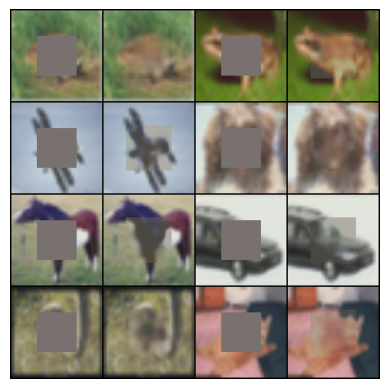

In [9]:
show_context_encoder_inpainting()

### Linear Classification
By design the model architecture is an encoder -> decoder module. We can use the bottleneck layer as our learned representation. Below, we show linear classification accuracy results on CIFAR10 using the learned representations.

In [10]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder')

cifar_train_acc1_inpainting, cifar_train_acc5_inpainting = evaluate_classifier(model, linear_classifier, train_loader)
cifar_test_acc1_inpainting, cifar_test_acc5_inpainting = evaluate_classifier(model, linear_classifier, test_loader)

print('Train Set')
print(f'Top 1 Accuracy: {cifar_train_acc1_inpainting}, Top 5 Accuracy: {cifar_train_acc5_inpainting}\n')
print('Test Set')
print(f'Top 1 Accuracy: {cifar_test_acc1_inpainting}, Top 5 Accuracy: {cifar_test_acc5_inpainting}\n')

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 53.236, Top 5 Accuracy: 94.094

Test Set
Top 1 Accuracy: 45.77, Top 5 Accuracy: 90.29



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

In [ ]:
display_nearest_neighbors('context_encoder', model, test_loader)

### ImageNet

In [11]:
imagenet_train, imagenet_val, imagenet_classes = load_imagenet('context_encoder')
imagenet_classes

100

In [12]:
def evaluate(model, loader):
    model.eval()
    correct_top1 = 0
    correct_top5 = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Calcul de la précision Top-1
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct_top1 += predicted.eq(labels).sum().item()

            # Calcul de la précision Top-5
            _, top5_preds = outputs.topk(5, 1, True, True)
            correct_top5 += top5_preds.eq(labels.view(-1, 1).expand_as(top5_preds)).sum().item()

    return 100. * correct_top1 / total, 100. * correct_top5 / total

In [13]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ContextEncoder(dataset='imagenet', n_classes=imagenet_classes)
model.to(device)

lr = 0.001
epochs = 5
batch_size = 32
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    for batch_idx, (data, _) in enumerate(imagenet_train):
        data = data.to(device)

        optimizer.zero_grad()
        outputs, _ = model(data)
        loss = criterion(outputs['Loss'], data)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx}/{len(imagenet_train)}], Loss: {loss.item():.4f}")

print("Pretext Task Training Finished!")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([128, 3, 128, 128])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/5], Step [0/391], Loss: 3.8567
Epoch [1/5], Step [100/391], Loss: 1.5696
Epoch [1/5], Step [200/391], Loss: 1.5763
Epoch [1/5], Step [300/391], Loss: 1.4810


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([80, 3, 128, 128])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [2/5], Step [0/391], Loss: 1.4097
Epoch [2/5], Step [100/391], Loss: 1.3328
Epoch [2/5], Step [200/391], Loss: 1.4620
Epoch [2/5], Step [300/391], Loss: 1.3729
Epoch [3/5], Step [0/391], Loss: 1.4364
Epoch [3/5], Step [100/391], Loss: 1.4885
Epoch [3/5], Step [200/391], Loss: 1.4469
Epoch [3/5], Step [300/391], Loss: 1.3920
Epoch [4/5], Step [0/391], Loss: 1.3166
Epoch [4/5], Step [100/391], Loss: 1.4958
Epoch [4/5], Step [200/391], Loss: 1.3769
Epoch [4/5], Step [300/391], Loss: 1.2512
Epoch [5/5], Step [0/391], Loss: 1.3296
Epoch [5/5], Step [100/391], Loss: 1.5565
Epoch [5/5], Step [200/391], Loss: 1.4192
Epoch [5/5], Step [300/391], Loss: 1.3507
Pretext Task Training Finished!


In [14]:
classifier = model.construct_classifier().to(device)
model.classifier = classifier

optimizer = optim.Adam(model.classifier.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(epochs):
    for batch_idx, (data, targets) in enumerate(imagenet_train):
        data, targets = data.to(device), targets.to(device)

        features = model.encode(data)
        features = torch.flatten(features, 1)
        outputs = model.classifier(features)

        optimizer.zero_grad()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx}/{len(imagenet_train)}], Loss: {loss.item():.4f}")

print("Classification Training Finished!")

Epoch [1/5], Step [0/391], Loss: 4.7171
Epoch [1/5], Step [100/391], Loss: 5.1832
Epoch [1/5], Step [200/391], Loss: 5.2419
Epoch [1/5], Step [300/391], Loss: 4.8032
Epoch [2/5], Step [0/391], Loss: 5.1236
Epoch [2/5], Step [100/391], Loss: 4.8902
Epoch [2/5], Step [200/391], Loss: 5.1569
Epoch [2/5], Step [300/391], Loss: 5.0015
Epoch [3/5], Step [0/391], Loss: 5.1046
Epoch [3/5], Step [100/391], Loss: 4.8391
Epoch [3/5], Step [200/391], Loss: 5.1512
Epoch [3/5], Step [300/391], Loss: 4.7880
Epoch [4/5], Step [0/391], Loss: 4.8091
Epoch [4/5], Step [100/391], Loss: 4.9479
Epoch [4/5], Step [200/391], Loss: 5.0684
Epoch [4/5], Step [300/391], Loss: 5.0717
Epoch [5/5], Step [0/391], Loss: 4.9590
Epoch [5/5], Step [100/391], Loss: 4.9703
Epoch [5/5], Step [200/391], Loss: 5.0364
Epoch [5/5], Step [300/391], Loss: 4.6993
Classification Training Finished!


In [15]:
def evaluate(model, loader):
    model.eval()
    correct_top1 = 0
    correct_top5 = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            # Encode the images and then classify
            features = model.encode(images)
            features = torch.flatten(features, 1)  # Flatten for FC layer
            outputs = model.classifier(features)

            # Calcul de la précision Top-1
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct_top1 += predicted.eq(labels).sum().item()

            # Calcul de la précision Top-5
            _, top5_preds = outputs.topk(5, 1, True, True)
            correct_top5 += top5_preds.eq(labels.view(-1, 1).expand_as(top5_preds)).sum().item()

    return 100. * correct_top1 / total, 100. * correct_top5 / total

imagenet_top1_train_inpainting , imagenet_top5_train_inpainting  = evaluate(model, imagenet_train)
imagenet_top1_test_inpainting , imagenet_top5_test_inpainting  = evaluate(model, imagenet_val)

print("Train Set\nTop 1 Accuracy: {:.3f}, Top 5 Accuracy: {:.2f}\n".format(imagenet_top1_train_inpainting, imagenet_top5_train_inpainting))
print("Test Set\nTop 1 Accuracy: {:.3f}, Top 5 Accuracy: {:.2f}".format(imagenet_top1_test_inpainting, imagenet_top5_test_inpainting))

Train Set
Top 1 Accuracy: 4.250, Top 5 Accuracy: 14.33

Test Set
Top 1 Accuracy: 1.290, Top 5 Accuracy: 4.45


## Demo 2: Rotation Prediction [[2]](https://arxiv.org/abs/1803.07728)

In this paper, the authors show that accurately predicting the degrees of rotation in images is a self-supervised learning task that learns good representations for downstream tasks.

![](https://drive.google.com/uc?id=1eHXLH-N_6uMGRzdf1Wjnga26qlS5-FRv)

More specifically, the authors showed that training a common CNN architecture (AlexNet, ResNet) on the rotation task learns semantically interpretable convolutional masks similar to those learned in supervised learning.

### Example Code

In [18]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import alexnet as AlexNet


class RotationPrediction(nn.Module):
    metrics = ['Loss', 'Acc1']
    metrics_fmt = [':.4e', ':6.2f']

    def __init__(self, dataset, n_classes):
        super().__init__()
        if dataset == 'cifar10':
            self.model = NetworkInNetwork()
            self.latent_dim = 192 * 8 * 8
            self.feat_layer = 'conv2'
        elif 'imagenet' in dataset:
            self.model = AlexNet()
            self.latent_dim = 256 * 13 * 13
            self.feat_layer = 'conv5'
        else:
            raise Exception('Unsupported dataset:', dataset)
        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        if self.dataset == 'cifar10':
            classifier = nn.Sequential(
                Flatten(),
                nn.BatchNorm1d(self.latent_dim, affine=False),
                nn.Linear(self.latent_dim, self.n_classes)
            )
        elif 'imagenet' in self.dataset:
            classifier = nn.Sequential(
                nn.AdaptiveMaxPool2d((6, 6)),
                nn.BatchNorm2d(256, affine=False),
                Flatten(),
                nn.Linear(256 * 6 * 6, self.n_classes)
            )
        else:
            raise Exception('Unsupported dataset:', dataset)
        return classifier

    def forward(self, images):
        batch_size = images.shape[0]
        images, targets = self._preprocess(images)
        targets = targets.to(images.get_device())

        logits, zs = self.model(images, out_feat_keys=('classifier', self.feat_layer))
        loss = F.cross_entropy(logits, targets)

        pred = logits.argmax(dim=-1)
        correct = pred.eq(targets).float().sum()
        acc = correct / targets.shape[0] * 100.

        return dict(Loss=loss, Acc1=acc), zs[:batch_size]

    def encode(self, images):
        zs = self.model(images, out_feat_keys=(self.feat_layer,))
        return zs

    def _preprocess(self, images):
        batch_size = images.shape[0]
        images_90 = torch.flip(images.transpose(2, 3), (2,))
        images_180 = torch.flip(images, (2, 3))
        images_270 = torch.flip(images, (2,)).transpose(2, 3)
        images_batch = torch.cat((images, images_90, images_180, images_270), dim=0)
        targets = torch.arange(4).long().repeat(batch_size)
        targets = targets.view(batch_size, 4).transpose(0, 1)
        targets = targets.contiguous().view(-1)
        return images_batch, targets

### Linear Classification
We can use the feature maps in the later convolutional layers of the pretrained model as our learned representation for linear classification.

In [19]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation')

train_acc1_rot, train_acc5_rot = evaluate_classifier(model, linear_classifier, train_loader)
test_acc1_rot, test_acc5_rot = evaluate_classifier(model, linear_classifier, test_loader)

print('Train Set')
print(f'Top 1 Accuracy: {train_acc1_rot}, Top 5 Accuracy: {train_acc5_rot}\n')
print('Test Set')
print(f'Top 1 Accuracy: {test_acc1_rot}, Top 5 Accuracy: {test_acc5_rot}\n')

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Set
Top 1 Accuracy: 79.372, Top 5 Accuracy: 99.124

Test Set
Top 1 Accuracy: 79.91, Top 5 Accuracy: 99.12



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


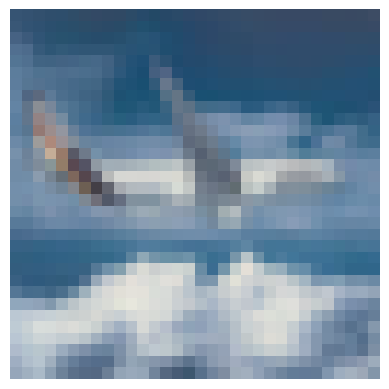

Top 16 Nearest Neighbors (in latent space)


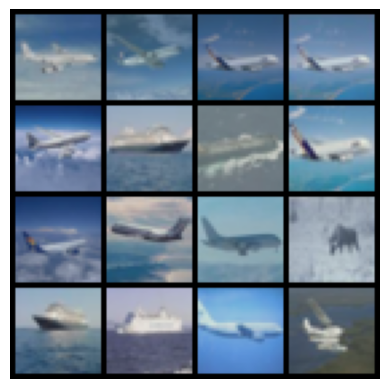

Image 2


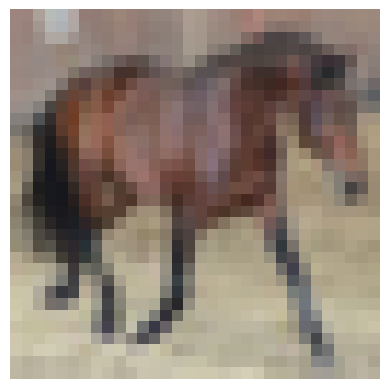

Top 16 Nearest Neighbors (in latent space)


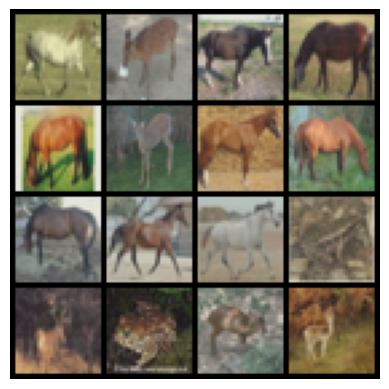

Image 3


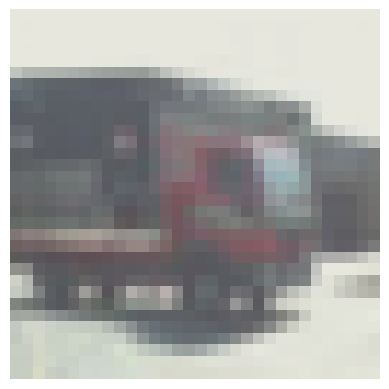

Top 16 Nearest Neighbors (in latent space)


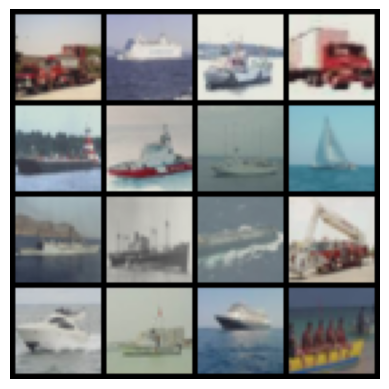

Image 4


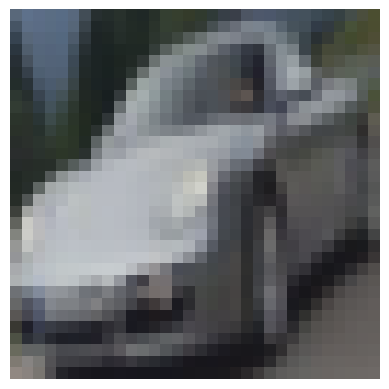

Top 16 Nearest Neighbors (in latent space)


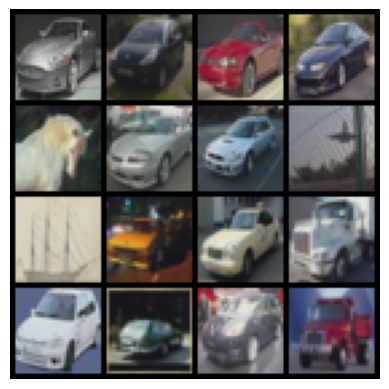

In [20]:
display_nearest_neighbors('rotation', model, test_loader)

### ImageNet

In [23]:
# imagenet_train, imagenet_val, imagenet_classes = load_imagenet('rotation')
# imagenet_classes

In [24]:
# import torch.optim as optim
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = RotationPrediction(dataset='imagenet', n_classes=4)
# model.to(device)

# lr = 0.001
# epochs = 2
# batch_size = 32

# optimizer = optim.Adam(model.parameters(), lr=lr)

# for epoch in range(epochs):
#     for batch_idx, (data, _) in enumerate(imagenet_train):
#         data = data.to(device)

#         optimizer.zero_grad()
#         outputs, _ = model(data)
#         loss = outputs['Loss']
#         loss.backward()
#         optimizer.step()

#         acc = outputs['Acc1'].item()

#         if batch_idx % 100 == 0:
#             print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx}/{len(imagenet_train)}], Loss: {loss.item():.4f}, Accuracy: {acc:.2f}%")

# print("Pretext Task Training Finished!")

In [25]:
# classifier = model.construct_classifier().to(device)
# model.classifier = classifier

# optimizer = optim.Adam(model.classifier.parameters(), lr=lr)
# criterion = torch.nn.CrossEntropyLoss()

# for epoch in range(epochs):
#     for batch_idx, (data, targets) in enumerate(imagenet_train):
#         data, targets = data.to(device), targets.to(device)

#         features = model.encode(data)
#         outputs = model.classifier(features)

#         optimizer.zero_grad()
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()

#         acc = (outputs.argmax(dim=1) == targets).float().mean().item() * 100

#         if batch_idx % 100 == 0:
#             print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx}/{len(imagenet_train)}], Loss: {loss.item():.4f}, Accuracy: {acc:.2f}%")

# print("Classification Training Finished!")

In [26]:
# imagenet_top1_train_rot , imagenet_top5_train_rot  = evaluate(model, imagenet_train)
# imagenet_top1_test_rot , imagenet_top5_test_rot  = evaluate(model, imagenet_val)

# print("Train Set\nTop 1 Accuracy: {:.3f}, Top 5 Accuracy: {:.2f}\n".format(imagenet_top1_train_rot, imagenet_top5_train_rot))
# print("Test Set\nTop 1 Accuracy: {:.3f}, Top 5 Accuracy: {:.2f}".format(imagenet_top1_test_rot, imagenet_top5_test_rot))

## Relative patch location

In [27]:
class RelativePositionModel(nn.Module):
    def __init__(self):
        super(RelativePositionModel, self).__init__()

        # Feature extractor
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Position classifier
        self.classifier = nn.Sequential(
            nn.Linear(64 * 4 * 4 * 2, 256),  # *2 for concat
            nn.ReLU(),
            nn.Linear(256, 8)  # 8 classes
        )

    def forward(self, patch1, patch2):
        f1 = self.features(patch1)
        f2 = self.features(patch2)

        # Concatenate features
        f_concat = torch.cat((f1.view(f1.size(0), -1), f2.view(f2.size(0), -1)), dim=1)

        return self.classifier(f_concat)

In [28]:
class CIFAR10Classifier(nn.Module):
    def __init__(self, pretrained_model):
        super(CIFAR10Classifier, self).__init__()
        self.features = pretrained_model.features

        self.classifier = nn.Sequential(
            nn.Linear(4096, 256), 
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [29]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os.path as osp
import random

# Step 1: Load dataset
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = 'cifar10'
train_dataset = datasets.CIFAR10(root=osp.join('data', dataset), train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root=osp.join('data', dataset), train=False, download=True, transform=transform_test)
len(train_dataset.classes)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def extract_patches(image, size=16):
    H, W = image.shape[1:3]

    px1, py1 = random.randint(0, W - size), random.randint(0, H - size)
    patch1 = image[:, py1:py1+size, px1:px1+size]
    rel = random.randint(0, 7)

    directions = [
        (1, 0),  # Droite
        (-1, 0), # Gauche
        (0, 1),  # Bas
        (0, -1), # Haut
        (1, 1),  # Bas Droite
        (-1, 1), # Bas Gauche
        (1, -1), # Haut Droite
        (-1, -1) # Haut Gauche
    ]

    dx, dy = directions[rel]
    px2, py2 = px1 + dx * size, py1 + dy * size

    # coord in limits ?
    px2 = max(0, min(px2, W - size))
    py2 = max(0, min(py2, H - size))

    patch2 = image[:, py2:py2+size, px2:px2+size]

    return patch1, patch2, rel

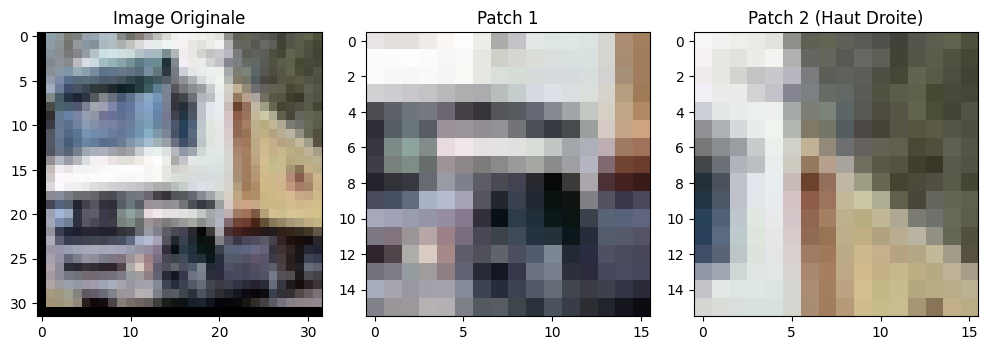

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random

image, _ = train_dataset[1]
image_np = image.numpy().transpose(1, 2, 0)

patch1, patch2, rel = extract_patches(image)

patch1_np = patch1.numpy().transpose(1, 2, 0)
patch2_np = patch2.numpy().transpose(1, 2, 0)

relations = [
    "Droite", "Gauche", "Bas", "Haut",
    "Bas Droite", "Bas Gauche", "Haut Droite", "Haut Gauche"
]

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow((image_np * 0.5 + 0.5)) 
plt.title("Image Originale")

plt.subplot(1, 3, 2)
plt.imshow((patch1_np * 0.5 + 0.5))
plt.title("Patch 1")

plt.subplot(1, 3, 3)
plt.imshow((patch2_np * 0.5 + 0.5))
plt.title(f"Patch 2 ({relations[rel]})")

plt.tight_layout()
plt.show()

In [32]:
epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = RelativePositionModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch_idx, (images, _) in enumerate(train_loader):
        images = images.to(device)

        patches1, patches2, rels = zip(*[extract_patches(img) for img in images])
        patches1 = torch.stack(patches1).to(device)
        patches2 = torch.stack(patches2).to(device)
        rels = torch.tensor(rels, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(patches1, patches2)
        loss = criterion(outputs, rels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / (batch_idx + 1)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/5], Loss: 1.2712
Epoch [2/5], Loss: 1.0144
Epoch [3/5], Loss: 0.9285
Epoch [4/5], Loss: 0.8761
Epoch [5/5], Loss: 0.8373


In [33]:
# Step 3: Use features learned
classifier = CIFAR10Classifier(pretrained_model=model).to(device)
optimizer_classifier = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer_classifier.zero_grad()
        outputs = classifier(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_classifier.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/5], Loss: 1.4147
Epoch [2/5], Loss: 1.6328
Epoch [3/5], Loss: 0.9366
Epoch [4/5], Loss: 0.8292
Epoch [5/5], Loss: 1.5438


In [34]:
def evaluate(model, loader):
    model.eval()
    correct_top1 = 0
    correct_top5 = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Calcul de la précision Top-1
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct_top1 += predicted.eq(labels).sum().item()

            # Calcul de la précision Top-5
            _, top5_preds = outputs.topk(5, 1, True, True)
            correct_top5 += top5_preds.eq(labels.view(-1, 1).expand_as(top5_preds)).sum().item()

    return 100. * correct_top1 / total, 100. * correct_top5 / total

In [35]:
# Step 4: Evaluate
top1_train_loc, top5_train_loc = evaluate(classifier, train_loader)
top1_test_loc, top5_test_loc = evaluate(classifier, test_loader)

print("Train Set\nTop 1 Accuracy: {:.3f}, Top 5 Accuracy: {:.2f}\n".format(top1_train_loc, top5_train_loc))
print("Test Set\nTop 1 Accuracy: {:.3f}, Top 5 Accuracy: {:.2f}".format(top1_test_loc, top5_test_loc))

Train Set
Top 1 Accuracy: 65.490, Top 5 Accuracy: 97.04

Test Set
Top 1 Accuracy: 67.580, Top 5 Accuracy: 97.47


## Demo 3: SimCLR [[3]](https://arxiv.org/abs/2002.05709)

SimCLR is a contrastive learning framework to learn strong visual representations. An image $x$ is processed using data augmentation to produce two variants $x_i$ and $x_j$ which are both fed into encoder $f$ (a CNN) and projection head $g$ (a small MLP). The models optimize a contrastive loss to maximally align projected latents $z_i, z_j$. We consider $x_i, x_j$ as a positive pair, and any other $x_i, x_k$ pairs (i.e. different images in the same batch) are negative pairs. A visual diagram of the training procedure is shown below (from the paper).

![](https://drive.google.com/uc?id=1XW1uIkUTMSa0DZncivSYXzM5gA5FIhF6)

More formally, the loss between positive example $z_i, z_j$ is:
$$\ell_{i,j} = -\log{\frac{\exp(\text{sim}(z_i, z_j)/\tau)}{\sum_{k=1}^{2N}\mathbb{1}_{[k\neq i]}\exp(\text{sim}(z_i, z_k)/\tau)}}$$
where $\text{sim}(z_i, z_j) = z_i^Tz_j / (\left\Vert z_i \right\Vert \left\Vert z_j \right\Vert)$. The loss function can also be interpreted as a standard cross entropy loss to classify positive samples where logits are constructed using a given similarity function.

Note: A common idea in contrastive learning methods is that a larger batch means more negative samples. Therefore, these methods usually benefit the most from large-batch learning compared to other self-supervised learning tasks.

### Example Code

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from deepul_helper.resnet import resnet_v1
from deepul_helper.batch_norm import SyncBatchNorm, BatchNorm1d

# Some code adapted from https://github.com/sthalles/SimCLR
class SimCLR(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes, dist=None):
        super().__init__()
        self.temperature = 0.5
        self.projection_dim = 128

        if dataset == 'cifar10':
            resnet = resnet_v1((3, 32, 32), 50, 1, cifar_stem=True)
            resnet = SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048
        elif 'imagenet' in dataset:
            resnet = resnet_v1((3, 128, 128), 50, 1, cifar_stem=False)
            if dist is not None:
                resnet = nn.SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048

        self.proj = nn.Sequential(
            nn.Linear(self.latent_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim),
            nn.ReLU(inplace=True),
            nn.Linear(self.projection_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim, center=False)
        )

        self.dataset = dataset
        self.n_classes = n_classes
        self.dist = dist

    def construct_classifier(self):
        return nn.Sequential(nn.Linear(self.latent_dim, self.n_classes))

    def forward(self, images):
        n = images[0].shape[0]
        xi, xj = images
        hi, hj = self.encode(xi), self.encode(xj) # (N, latent_dim)
        zi, zj = self.proj(hi), self.proj(hj) # (N, projection_dim)
        zi, zj = F.normalize(zi), F.normalize(zj)

        # Each training example has 2N - 2 negative samples
        # 2N total samples, but exclude the current and positive sample

        if self.dist is None:
            zis = [zi]
            zjs = [zj]
        else:
            zis = [torch.zeros_like(zi) for _ in range(self.dist.get_world_size())]
            zjs = [torch.zeros_like(zj) for _ in range(self.dist.get_world_size())]

            self.dist.all_gather(zis, zi)
            self.dist.all_gather(zjs, zj)

        z1 = torch.cat((zi, zj), dim=0) # (2N, projection_dim)
        z2 = torch.cat(zis + zjs, dim=0) # (2N * n_gpus, projection_dim)

        sim_matrix = torch.mm(z1, z2.t()) # (2N, 2N * n_gpus)
        sim_matrix = sim_matrix / self.temperature
        # Mask out same-sample terms
        n_gpus = 1 if self.dist is None else self.dist.get_world_size()
        rank = 0 if self.dist is None else self.dist.get_rank()
        sim_matrix[torch.arange(n), torch.arange(rank*n, (rank+1)*n)]  = -float('inf')
        sim_matrix[torch.arange(n, 2*n), torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n)] = -float('inf')

        targets = torch.cat((torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n),
                             torch.arange(rank*n, (rank+1)*n)), dim=0)
        targets = targets.to(sim_matrix.get_device()).long()

        loss = F.cross_entropy(sim_matrix, targets, reduction='sum')
        loss = loss / n
        return dict(Loss=loss), hi

    def encode(self, images):
        return self.resnet(images[0])

    def get_features(self, images):
        return self.resnet.get_features(images)


### Linear Classification
We can use the encoded vector $h_i$ as our latent representation.

In [37]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr')

train_acc1_simclr, train_acc5_simclr = evaluate_classifier(model, linear_classifier, train_loader)
test_acc1_simclr, test_acc5_simclr = evaluate_classifier(model, linear_classifier, test_loader)

print('Train Set')
print(f'Top 1 Accuracy: {train_acc1_simclr}, Top 5 Accuracy: {train_acc5_simclr}\n')
print('Test Set')
print(f'Top 1 Accuracy: {test_acc1_simclr}, Top 5 Accuracy: {test_acc5_simclr}\n')

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 90.06, Top 5 Accuracy: 99.506

Test Set
Top 1 Accuracy: 92.84, Top 5 Accuracy: 99.86



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


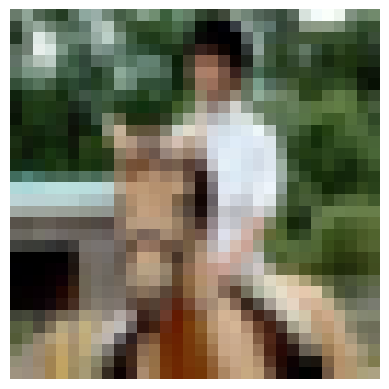

Top 16 Nearest Neighbors (in latent space)


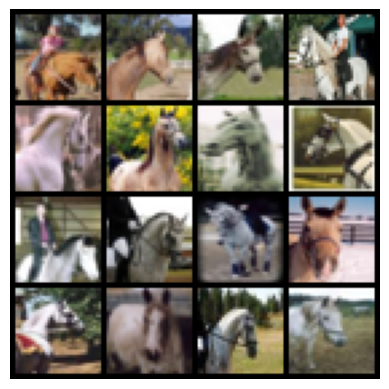

Image 2


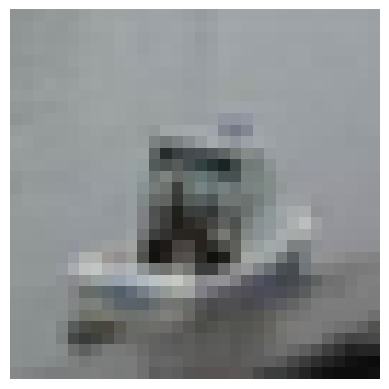

Top 16 Nearest Neighbors (in latent space)


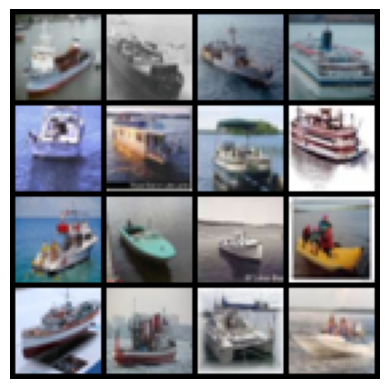

Image 3


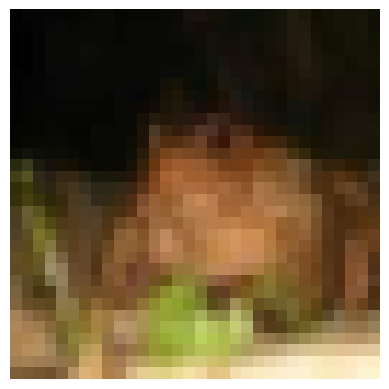

Top 16 Nearest Neighbors (in latent space)


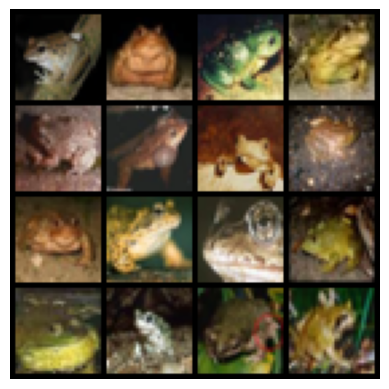

Image 4


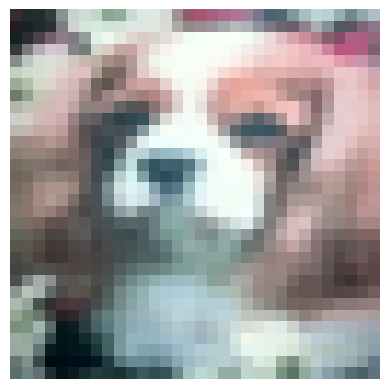

Top 16 Nearest Neighbors (in latent space)


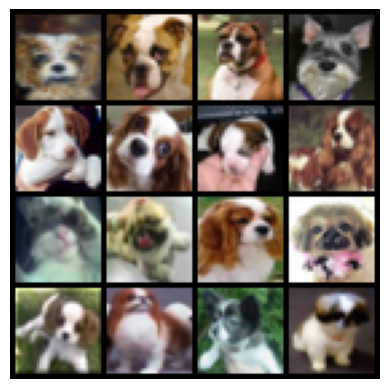

In [38]:
display_nearest_neighbors('simclr', model, test_loader)

## Other Tasks
In addition to the above tasks, prior work has also investigated other self-superivsed tasks such as solving jigsaw puzzles [[4]](https://arxiv.org/abs/1603.09246), cycle-consistency [[5]](https://arxiv.org/abs/1903.07593), contrastive learning [[6]](https://arxiv.org/abs/1807.03748)[[7]](https://arxiv.org/abs/1905.09272)[[8]](https://arxiv.org/abs/1906.05849)[[9]](https://arxiv.org/abs/1911.05722), and patch prediction [[10]](https://arxiv.org/abs/1505.05192). See [here](https://github.com/jason718/awesome-self-supervised-learning) for a great resource on more self-supervised learning papers.

# Compare Result

            Inpainting_CIFAR  Rot_CIFAR  SimCLR  Loc_CIFAR
Train Top1            53.236     79.372  90.060     65.490
Train Top5            94.094     99.124  99.506     97.038
Test Top1             45.770     79.910  92.840     67.580
Test Top5             90.290     99.120  99.860     97.470



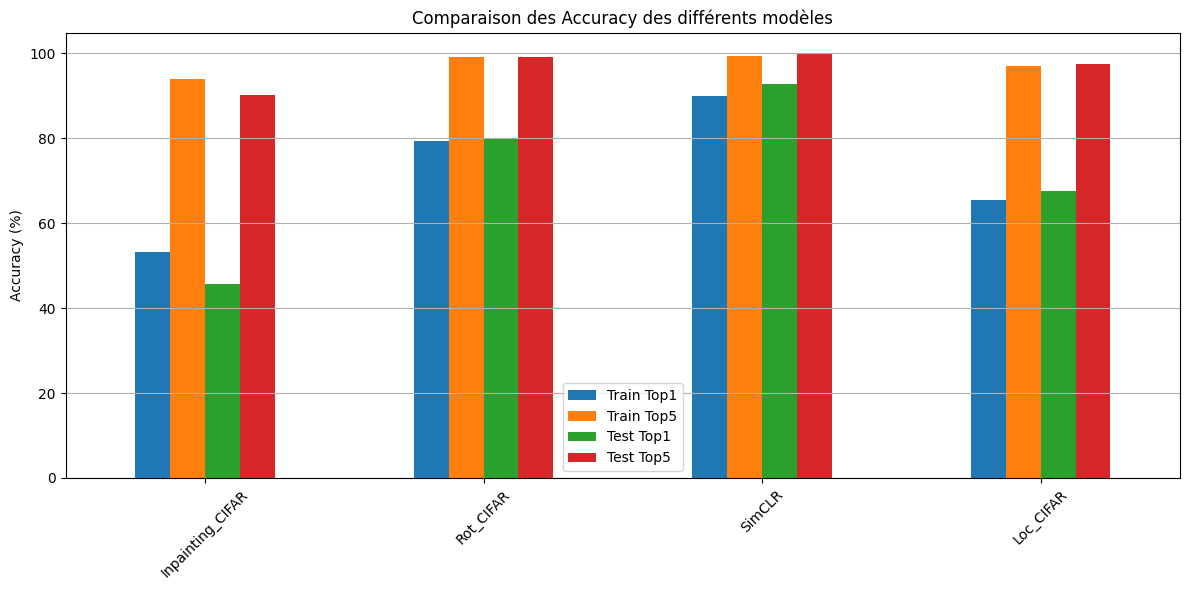

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

def display_results(**results):
    df = pd.DataFrame(results, index=['Train Top1', 'Train Top5', 'Test Top1', 'Test Top5'])
    print(df)
    print()

    df.T.plot(kind='bar', figsize=(12, 6))
    plt.title('Comparaison des Accuracy des différents modèles')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

display_results(
    Inpainting_CIFAR=[cifar_train_acc1_inpainting, cifar_train_acc5_inpainting, cifar_test_acc1_inpainting, cifar_test_acc5_inpainting],
    Rot_CIFAR=[train_acc1_rot, train_acc5_rot, test_acc1_rot, test_acc5_rot],
    SimCLR=[train_acc1_simclr, train_acc5_simclr, test_acc1_simclr, test_acc5_simclr],
    Loc_CIFAR=[top1_train_loc, top5_train_loc, top1_test_loc, top5_test_loc]
)


# Demo 4: Using Representations for Downstream Tasks

After pretraining a model on a self-supervised learning task, we can use it for other downstream tasks. In this demo, we use the pre-trained ResNet50 backbone from training SimCLR on a subset of ImageNet to learn a semantic segmentation model on Pascal VOC 2012. We use a simple U-Net [[11]](https://arxiv.org/abs/1505.04597) architecture with skip connections across feature maps between the SimCLR encoder and learned upsampling decoder. We do not fine-tune the SimCLR ResNet50 backbone, and only optimize the upsampling portion.

![](https://drive.google.com/uc?id=19dxxcwof0IA0jyv0VCl4rnZZf3ajA22s)

The training script can be found in `train_segmentation.py` [here](https://github.com/wilson1yan/cs294-158-ssl/blob/master/train_segmentation.py).

## Example Code

In [40]:
# Code adapted from https://github.com/qubvel/segmentation_models.pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
from deepul_helper.resnet import NormReLU

class SegmentationModel(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, n_classes):
        super().__init__()

        decoder_channels = (512, 256, 128, 64, 32)
        encoder_channels = (2048, 1024, 512, 256, 64) # Starting from head (resnet 50)

        # Construct decoder blocks
        in_channels = [encoder_channels[0]] + list(decoder_channels[:-1])
        skip_channels = list(encoder_channels[1:]) + [0]
        out_channels = decoder_channels
        blocks = [
            DecoderBlock(in_ch, skip_ch, out_ch)
            for in_ch, skip_ch, out_ch in zip(in_channels, skip_channels, out_channels)
        ]
        self.dec_blocks = nn.ModuleList(blocks)

        # Segmentation head for output prediction
        self.seg_head = nn.Conv2d(decoder_channels[-1], n_classes, kernel_size=3, padding=1)

    def forward(self, features, targets):
        features = features[1:] # remove first skip with same spatial resolution
        features = features[::-1] # reverse channels to start from head of encoder

        skips = features[1:]
        x = features[0]
        for i, decoder_block in enumerate(self.dec_blocks):
            skip = skips[i] if i < len(skips) else None
            x = decoder_block(x, skip)

        logits = self.seg_head(x)
        loss = F.cross_entropy(logits, targets)

        return dict(Loss=loss), logits


class DecoderBlock(nn.Module):
    def __init__(
            self,
            in_channels,
            skip_channels,
            out_channels,
    ):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels + skip_channels, out_channels,
                      kernel_size=3, padding=1),
            NormReLU((out_channels, None, None)), # only care about channel dim for BN
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            NormReLU((out_channels, None, None))
        )

    def forward(self, x, skip=None):
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        if skip is not None:
            x = torch.cat([x, skip], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

## Segmentation Results
Below, we show a random subset of segmentations from the trained model. Every set of 3 images consists of the original image, the labeled segmentation, and the predicted segmentation.

Using downloaded and verified file: data/pascalvoc2012/VOCtrainval_11-May-2012.tar
Extracting data/pascalvoc2012/VOCtrainval_11-May-2012.tar to data/pascalvoc2012
Using downloaded and verified file: data/pascalvoc2012/VOCtrainval_11-May-2012.tar
Extracting data/pascalvoc2012/VOCtrainval_11-May-2012.tar to data/pascalvoc2012


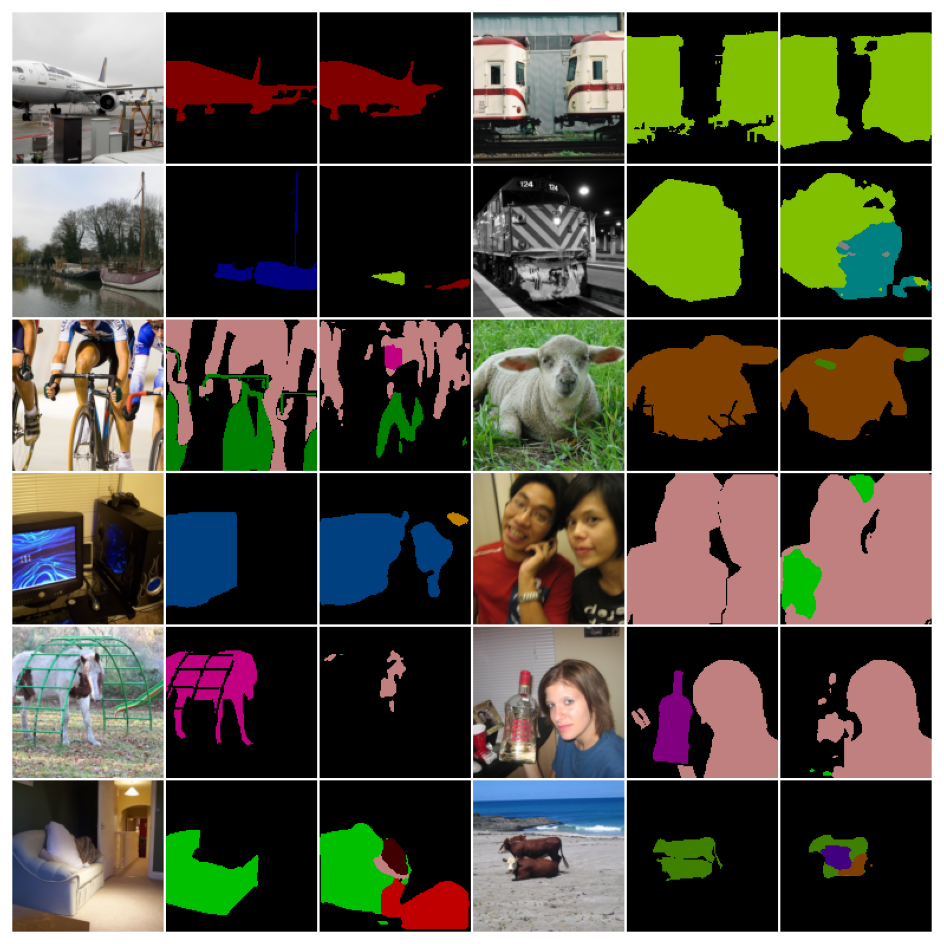

In [41]:
from deepul_helper.demos import show_segmentation
show_segmentation()

# Demo 5: Avoiding Trivial Representations in Self-Supervised Tasks

When designing a self-supervised learning task, it is important to make sure that no trivial solutions exists. In general, a learned solution is trivial if the model is able to successfully complete its task by taking advantage of low-level features. As a result, it doesn't learn a good representation so downstream performance is bad.

For example, in the jigsaw [[4]](https://arxiv.org/abs/1603.09246) task, a model can "cheat" by just looking at the boundary textures of the jigsaw pieces, or following and matching straight lines across different pieces. These issues can generally be fixed by ranndom cropping, shifting, and spacially jittering.

We look at two other less obvious aspects of images that may reduce performance.

## Chromatic Aberration

Chromatic aberration occurs when the different focal lengths of light results in the light not meeting all at the same point.
![from wikipedia](https://drive.google.com/uc?id=1PYGoQWnH0aAeiE_8t4ef5WDcq1UIQQ5t)

A example of very apparent chromatic aberration is shown below, where the green and magenta colors are clearly offset with each other:

![](https://drive.google.com/uc?id=1M1B6kV6ddBwyJse3FQT8_XBTeqs5s5WL)

Chromatic aberration generally becomes a problem in patch-based self-supervised learning tasks that design, such as solving jigsaw puzzles, or predicintg the correct location of a patch in an image In this case, the model can take advantage of the low-level chromatic aberration features to get a strong idea of where the patch is located without understanding the actual context.

Below is a quick demo of chromatic aberration in more realistic images, and possible fixes. Note that in general, chromatic aberration is fairly hard to spot with the naked eye, but deep learning models are still able to use it to their advantage.

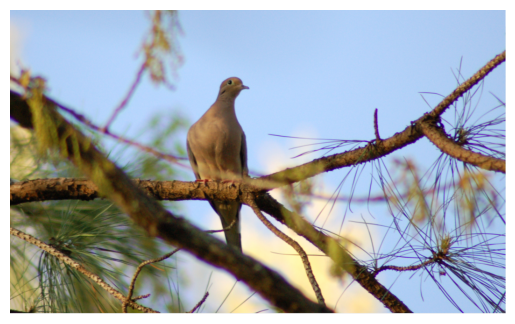

In [42]:
from PIL import Image
import matplotlib.pyplot as plt

# You can see some chromatic aberration in the purple fringes around the branches

image = Image.open('sample_images/chrom_ab_demo.png')
plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

Chromatic aberration is generally fixed through conversion to grayscale, or color dropping. Color dropping works by dropping 2 of the color channels and replacing them with random noise uniform or Gaussian noise.

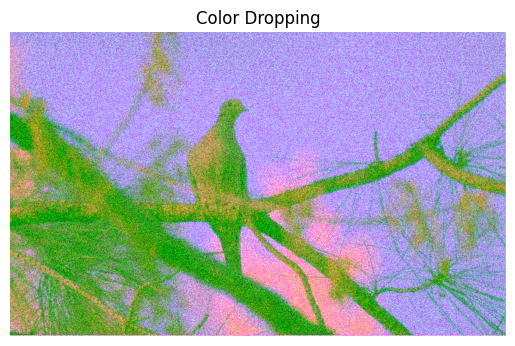

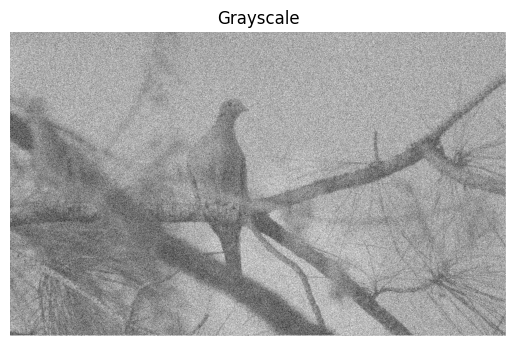

In [43]:
import numpy as np

# Color Dropping
# We will drop all channels except R
image_cpy = image.copy()
pixels = image_cpy.load()

arr = np.array(image_cpy)
std_R = np.std(arr[:, :, 0])
mean_G, mean_B = np.mean(arr[:, :, 1]), np.mean(arr[:, :, 2])

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j] # (R, G, B, A)
    R, A = p[0], p[3]
    G = int(np.random.randn() * std_R + mean_G)
    B = int(np.random.randn() * std_R + mean_B)
    pixels[i, j] = (R, G, p[2], p[3])

plt.figure()
plt.title('Color Dropping')
plt.axis('off')
plt.imshow(image_cpy)
plt.show()

# Grayscale
image_cpy2 = image.copy()
pixels2 = image_cpy2.load()

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j]
    G = int(0.3 * p[0] + 0.59 * p[1] + 0.11 * p[2])
    pixels2[i, j] = (G, G, G, 255)

plt.figure()
plt.title('Grayscale')
plt.axis('off')
plt.imshow(image_cpy2)
plt.show()

## Color Intensity Histograms

In the SimCLR paper, the authors show that the histogram of color intensities of different patches within the same image have very similar histograms, which may degrade training by encouraging models to look at low-level (pixel intensity) features to solve self-supervised tasks that involve matching positive patches of the same image.

Below, we run a similar demo to what was demonstrated in the paper

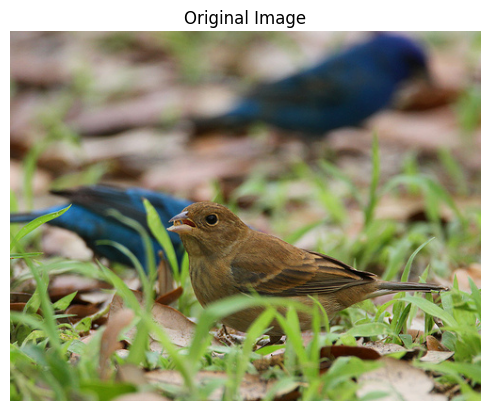

In [44]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Original Image')
plt.axis('off')
plt.imshow(image)
plt.show()

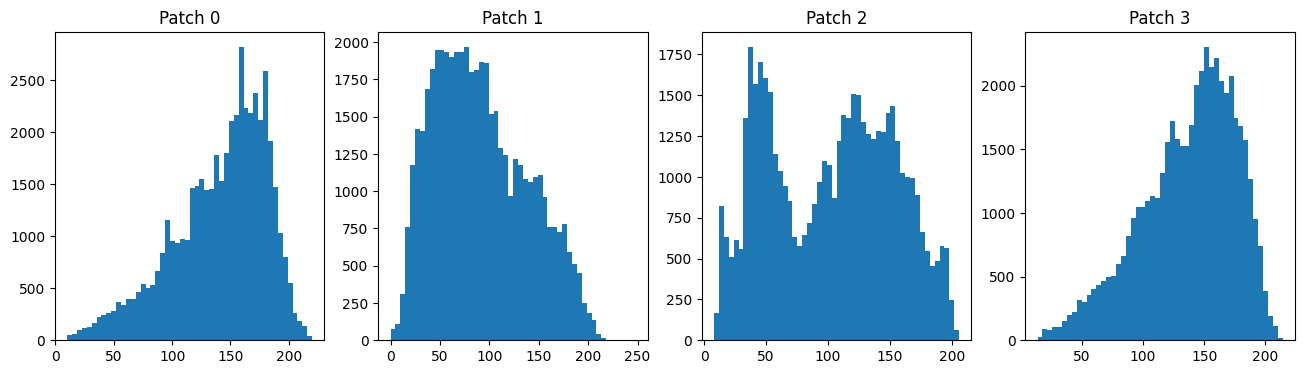

In [45]:
import numpy as np
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

Now we apply color jittering to mitigate this effect

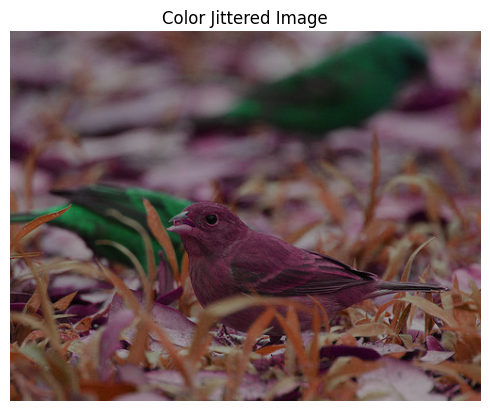

In [46]:
from torchvision import transforms

color_jitter = transforms.ColorJitter(0.3, 0.3, 0.3, 0.3)
jitter_img = color_jitter(image)

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Color Jittered Image')
plt.axis('off')
plt.imshow(jitter_img)
plt.show()

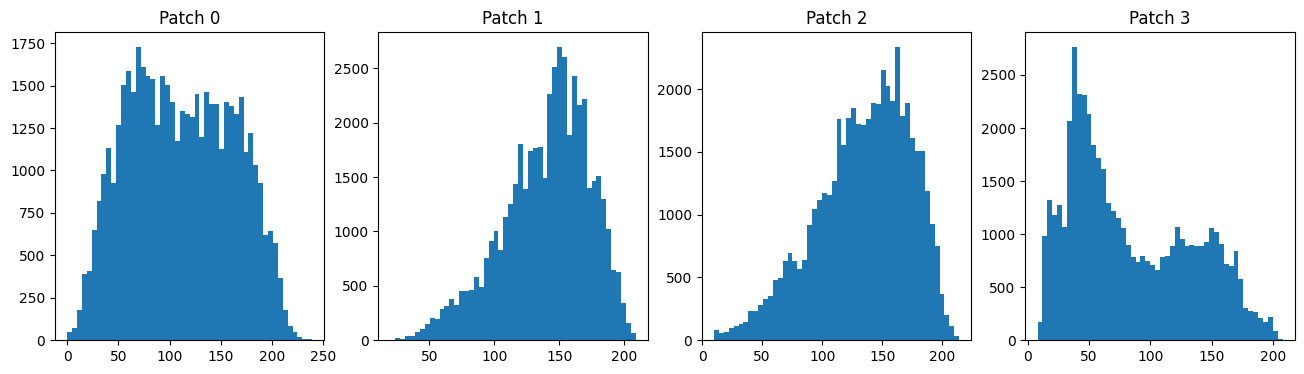

In [47]:
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()